# CHEOPS secondary eclipse modelling
## Case a: Mixed reflection and thermal emission

**Author:** Hannu Parviainen<br>
**Last edited:** 2.8.2021

While the TESS photometry coveres the whole KELT-1b phase, the CHEOPS photometry covers only the near vicinity of the secondary eclipse. This means that we can't estimate the ellipsoidal variations or Doppler boosting independently for the CHEOPS passband.

In [1]:
%run src/init_threading_for_multiprocessing.py

In [2]:
%pylab inline
rc('figure', figsize=(13,4))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from multiprocessing import Pool
from src import CHEOPSLPF

In [4]:
lpf = CHEOPSLPF('a')

In [5]:
def lnposterior(pv):
    return squeeze(lpf.lnposterior(pv))

pool = Pool(processes=16)

In [6]:
lpf.ps

[  0 |G| tc             N(μ = 2455914.1623686487, σ = 0.00036075967534218267) [    -inf ..      inf],
   1 |G| p              N(μ = 1.217494211307908, σ = 1.8333872888315754e-07) [    0.00 ..      inf],
   2 |G| rho            N(μ = 0.567348412839003, σ = 0.03998774043069618) [    0.00 ..      inf],
   3 |G| b              N(μ = 0.3385059906839748, σ = 0.07468033088440729) [    0.00 ..     1.00],
   4 |G| secw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   5 |G| sesw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   6 |P| k2             N(μ = 0.005813305131183557, σ = 7.117523186891932e-05) [    0.00 ..      inf],
   7 |G| oev            N(μ = 0.02550211198092813, σ = 0.03626265168082909) [    -inf ..      inf],
   8 |G| aev_cheops     N(μ = 0.00047999999999999996, σ = 2.9999999999999997e-05) [    0.00 ..      inf],
   9 |G| adb_cheops     N(μ = 6.3e-05, σ = 6.4e-06)              [    0.00 ..      inf],
  10 |G| log10_ted_cheop

## Find the global posterior mode

Global optimisation:   0%|          | 0/150 [00:00<?, ?it/s]

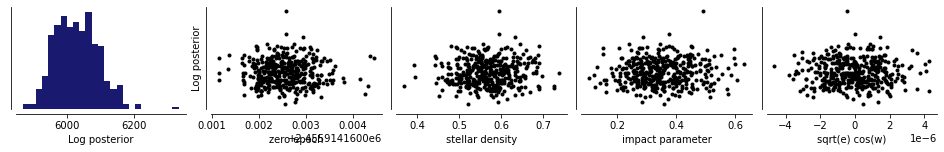

In [6]:
lpf.optimize_global(150, npop=400, pool=pool, vectorize=False, lnpost=lnposterior)

Global optimisation:   0%|          | 0/15000 [00:00<?, ?it/s]

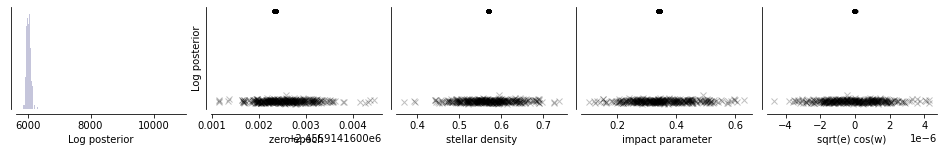

In [7]:
lpf.optimize_global(15000, npop=400, pool=pool, vectorize=False, lnpost=lnposterior)

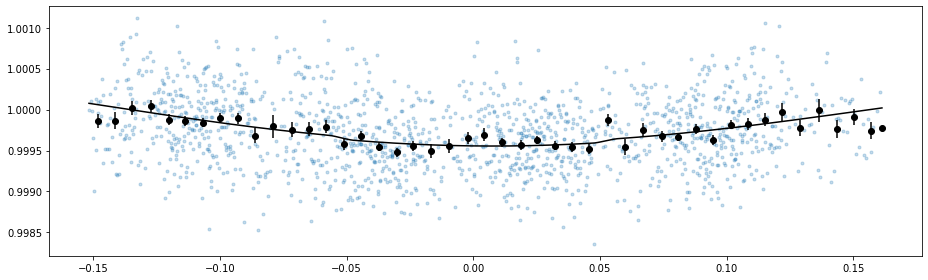

In [8]:
lpf.plot_folded_light_curve();

## Sample the posterior using MCMC

In [9]:
lpf.sample_mcmc(5000, 100, repeats=10, save=True, pool=pool, vectorize=False, lnpost=lnposterior)

MCMC sampling:   0%|          | 0/10 [00:00<?, ?it/s]

Run 1/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 2/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 3/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 4/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 5/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 6/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 7/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 8/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 9/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 10/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


In [10]:
df = lpf.posterior_samples()

<AxesSubplot:>

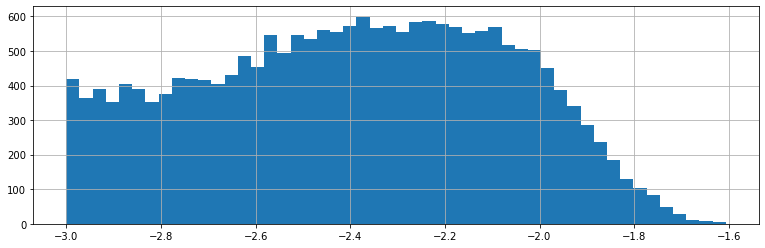

In [11]:
df.log10_ted_cheops.hist(bins=50)

<AxesSubplot:>

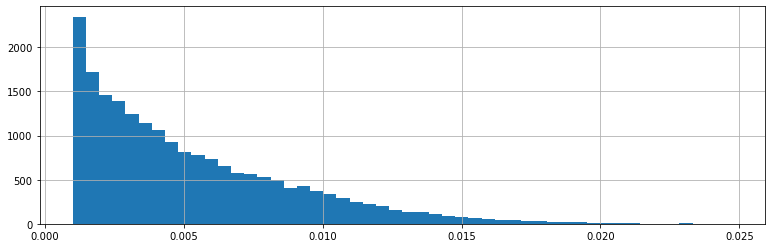

In [12]:
(10**df.log10_ted_cheops).hist(bins=50)

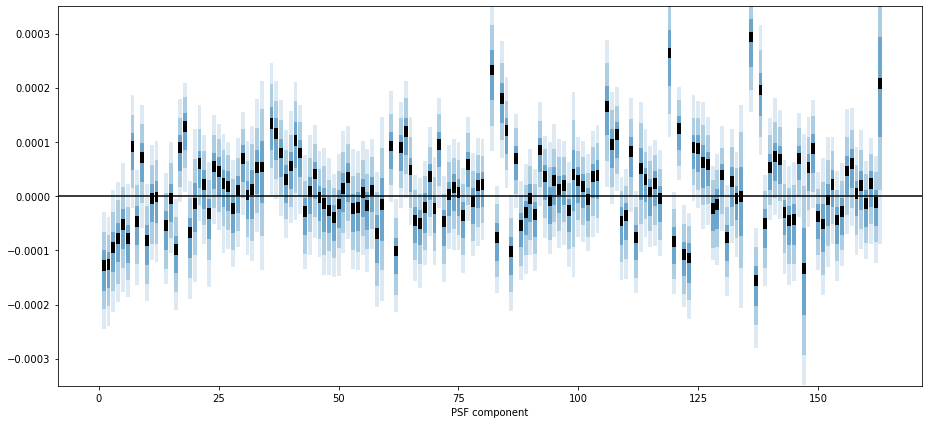

In [13]:
from src.kelt1 import bplot
df = lpf.posterior_samples(derived_parameters=False)

fig, ax = subplots(figsize=(13,6))
bplot(df.iloc[:,lpf._sl_lm])
ax.set_ylim(-0.00035, 0.00035)
setp(ax, xlabel='PSF component')
fig.tight_layout()

---

<center>&copy;2022 Hannu Parviainen</center>